In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os


In [2]:
merged_dir = "../../../data/merged"
Image_dir = "../../../images/DT"
train_file_path = os.path.join(merged_dir, "train_data.parquet")
train_data = pd.read_parquet(train_file_path)
test_file_path = os.path.join(merged_dir, "test_data.parquet")
test_data = pd.read_parquet(test_file_path)

In [3]:
# Prepare features and labels
X_train = train_data.drop(columns=['fire','longitude', 'latitude']).to_numpy()
y_train = train_data['fire'].to_numpy()

X_test = test_data.drop(columns=['fire','longitude', 'latitude']).to_numpy()
y_test = test_data['fire'].to_numpy()

In [4]:
import sys
from pathlib import Path

# Add the folders where the .py files live
sys.path.append(str(Path('../../../code/myModels').resolve()))
sys.path.append(str(Path('../../../code/Metrics').resolve()))

# Now import
from DecisionTree import MyDecisionTree
from classification import ClassificationMetrics, evaluate_predictions


In [5]:
# free up memory

import gc
gc.collect()

0

In [6]:
tree = MyDecisionTree(max_depth=15, min_samples_split=100, n_bins=100, chunk_size=10000)
tree.fit(X_train, y_train)


Starting tree training with 33832 samples...
[Depth 0] Processing root node with 33832 samples
Evaluating 58 features...
-> Split node #1: X[25] <= -0.7328 (IG=0.0516)
  [Depth 1] 764 samples, 2 classes
  Evaluating 58 features...
  -> Split node #2: X[26] <= -0.4024 (IG=0.1473)
    [Depth 2] 41 samples, 2 classes
    -> Leaf node #3: class=0 (min samples)
    [Depth 2] 723 samples, 2 classes
    Evaluating 58 features...
    -> Split node #4: X[26] <= -0.3974 (IG=0.1954)
      [Depth 3] 526 samples, 2 classes
      Evaluating 58 features...
      -> Split node #5: X[3] <= -0.2632 (IG=0.0161)
        [Depth 4] 525 samples, 2 classes
        Evaluating 58 features...
        -> Split node #6: X[0] <= -0.5080 (IG=0.0032)
          [Depth 5] 166 samples, 2 classes
          Evaluating 58 features...
          -> Split node #7: X[0] <= -0.5106 (IG=0.0281)
            [Depth 6] 159 samples, 1 classes
            -> Leaf node #8: class=1 (pure)
            [Depth 6] 7 samples, 2 classes
   

In [7]:
y_pred = tree.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

y_true = y_test

# 1️⃣ Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = np.unique(np.concatenate([y_true, y_pred]))

# Pretty-print confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=labels, columns=labels))

# 2️⃣ Classification report (precision, recall, f1-score)
report = classification_report(y_true, y_pred, digits=3)
print("\nClassification Report:")
print(report)



Confusion Matrix:
      0    1
0  7378  198
1   434  449

Classification Report:
              precision    recall  f1-score   support

           0      0.944     0.974     0.959      7576
           1      0.694     0.508     0.587       883

    accuracy                          0.925      8459
   macro avg      0.819     0.741     0.773      8459
weighted avg      0.918     0.925     0.920      8459



[Text(0.02654867256637168, 0.9375, 'X25 <= -0.733'),
 Text(0.0017699115044247787, 0.875, 'X26 <= -0.402'),
 Text(0.0, 0.8125, 'class = 0'),
 Text(0.01592920353982301, 0.8125, 'X26 <= -0.397'),
 Text(0.012389380530973451, 0.75, 'X3 <= -0.263'),
 Text(0.008849557522123894, 0.6875, 'X0 <= -0.508'),
 Text(0.005309734513274336, 0.625, 'X0 <= -0.511'),
 Text(0.0035398230088495575, 0.5625, 'class = 1'),
 Text(0.007079646017699115, 0.5625, 'class = 1'),
 Text(0.010619469026548672, 0.625, 'class = 1'),
 Text(0.01415929203539823, 0.6875, 'class = 0'),
 Text(0.019469026548672566, 0.75, 'X32 <= 0.500'),
 Text(0.017699115044247787, 0.6875, 'class = 0'),
 Text(0.023008849557522124, 0.6875, 'X14 <= -0.511'),
 Text(0.021238938053097345, 0.625, 'class = 1'),
 Text(0.024778761061946902, 0.625, 'class = 1'),
 Text(0.6601769911504425, 0.875, 'X14 <= 1.502'),
 Text(0.09026548672566372, 0.8125, 'X32 <= -1.667'),
 Text(0.06902654867256637, 0.75, 'X36 <= -0.650'),
 Text(0.06548672566371681, 0.6875, 'X2 <= 1.3

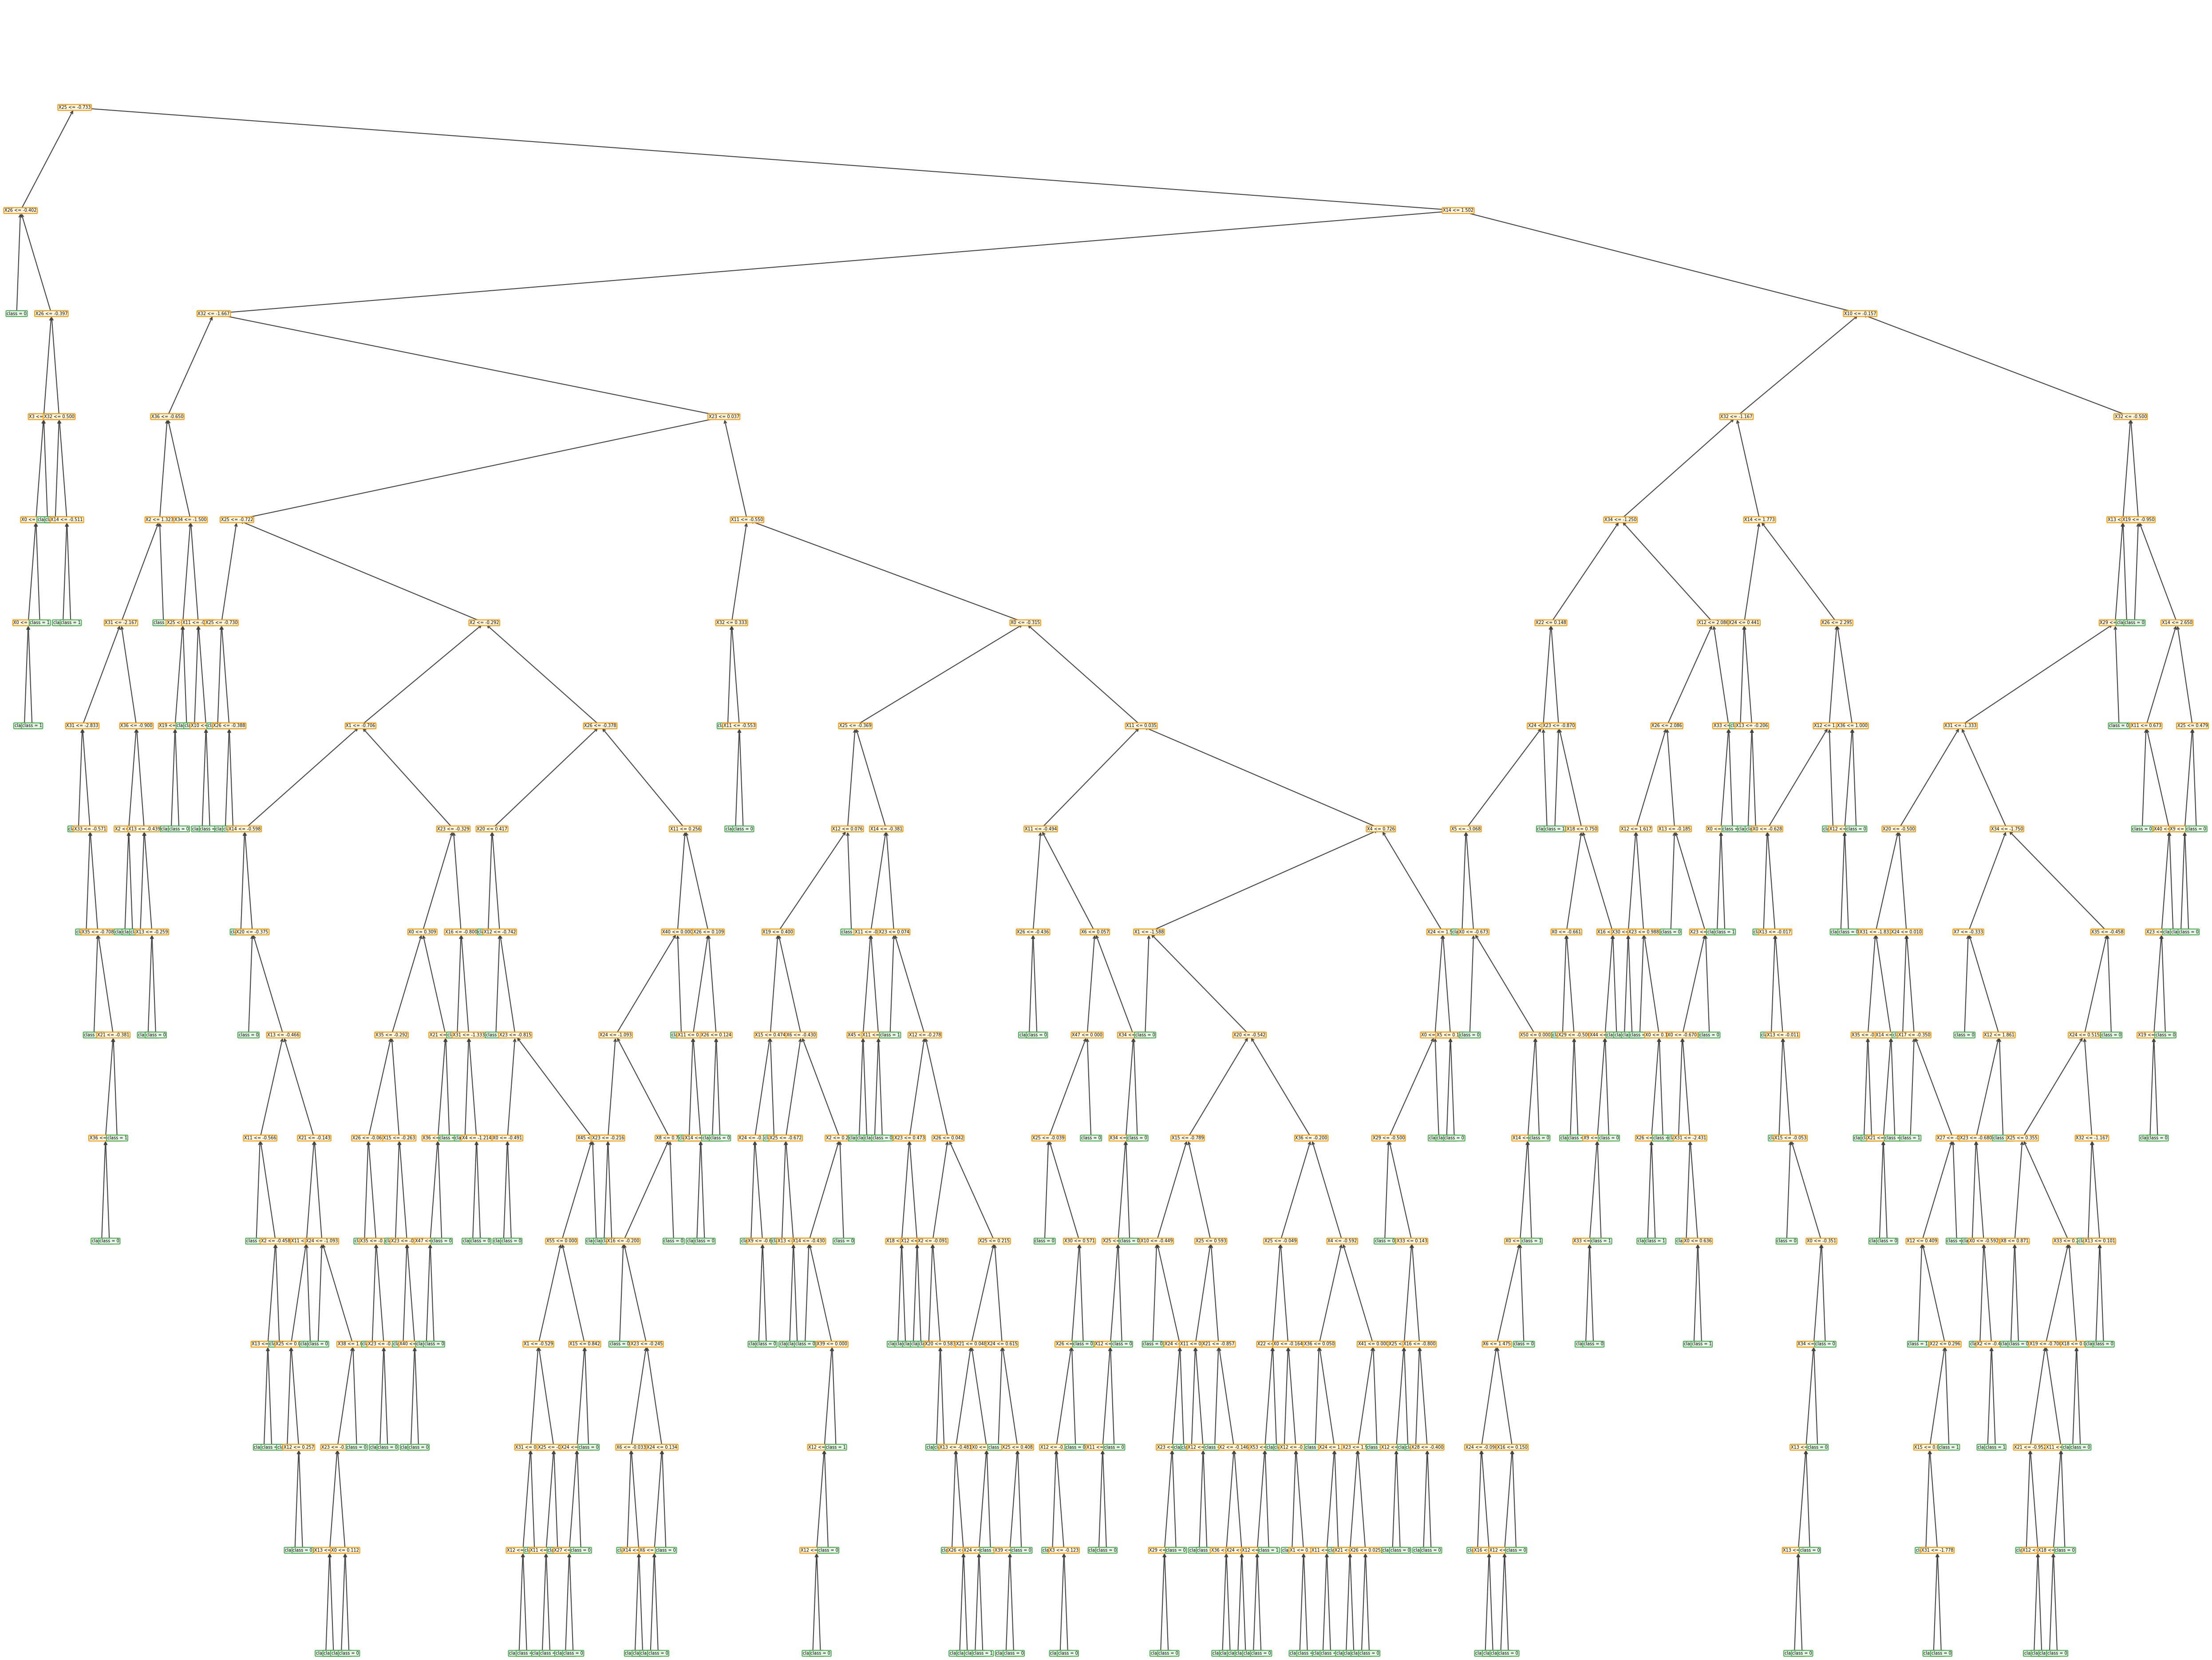

In [9]:
# Plot the tree
n_features = X_train.shape[1]
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"X{i}" for i in range(n_features)]
tree.plot(feature_names=feature_names)  # Shows full tree now!

In [10]:
# Show feature importances
print("\nFeature Importances:")
importances = tree.feature_importances()
for feat_idx, importance in sorted(importances.items(), key=lambda x: x[1], reverse=True):
    print(f"  X{feat_idx}: {importance:.4f}")


Feature Importances:
  X25: 0.2204
  X26: 0.1596
  X14: 0.1283
  X32: 0.1247
  X10: 0.0505
  X23: 0.0323
  X11: 0.0315
  X0: 0.0306
  X36: 0.0303
  X34: 0.0258
  X3: 0.0237
  X13: 0.0203
  X2: 0.0197
  X19: 0.0160
  X12: 0.0152
  X31: 0.0132
  X24: 0.0116
  X29: 0.0065
  X22: 0.0060
  X33: 0.0047
  X20: 0.0041
  X1: 0.0038
  X35: 0.0023
  X40: 0.0023
  X5: 0.0019
  X4: 0.0018
  X9: 0.0018
  X16: 0.0017
  X18: 0.0016
  X21: 0.0012
  X6: 0.0012
  X15: 0.0010
  X30: 0.0008
  X7: 0.0007
  X45: 0.0006
  X47: 0.0005
  X50: 0.0004
  X44: 0.0004
  X17: 0.0004
  X8: 0.0003
  X27: 0.0002
  X55: 0.0001
  X39: 0.0001
  X38: 0.0000
  X41: 0.0000
  X53: 0.0000
  X28: 0.0000


In [11]:
# map feature importances to feature names
feature_names = train_data.drop(columns=['fire', 'longitude', 'latitude']).columns if hasattr(train_data, 'columns') else [f"X{i}" for i in range(n_features)]
importance_dict = {feature_names[feat_idx]: importance for feat_idx, importance in importances.items()}
# print with feature names
print("\nFeature Importances with Names:")
for feat_name, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"  {feat_name}: {importance:.4f}")


Feature Importances with Names:
  prec_iqr_summer: 0.2204
  prec_iqr_winter: 0.1596
  prec_median_winter: 0.1283
  tmax_iqr_spring: 0.1247
  GYPSUM: 0.0505
  prec_iqr_autumn: 0.0323
  prec_median_autumn: 0.0315
  elevation: 0.0306
  prec_min: 0.0303
  tmax_iqr_winter: 0.0258
  CLAY: 0.0237
  prec_median_summer: 0.0203
  SAND: 0.0197
  tmax_median_autumn: 0.0160
  prec_median_spring: 0.0152
  tmax_iqr_autumn: 0.0132
  prec_iqr_spring: 0.0116
  tmin_iqr_summer: 0.0065
  tmax_median_winter: 0.0060
  tmax_iqr_summer: 0.0047
  tmax_median_spring: 0.0041
  COARSE: 0.0038
  tmax_max: 0.0023
  LCCCode_0004 // 0003: 0.0023
  PH_WATER: 0.0019
  TCARBON_EQ: 0.0018
  ESP: 0.0018
  tmin_median_spring: 0.0017
  tmin_median_winter: 0.0016
  tmax_median_summer: 0.0012
  TOTAL_N: 0.0012
  tmin_median_autumn: 0.0010
  tmin_iqr_winter: 0.0008
  CN_RATIO: 0.0007
  LCCCode_20049 // 20058: 0.0006
  LCCCode_21446 // 21450-121340 / 21454: 0.0005
  LCCCode_21497-121340: 0.0004
  LCCCode_11498: 0.0004
  tmin_m

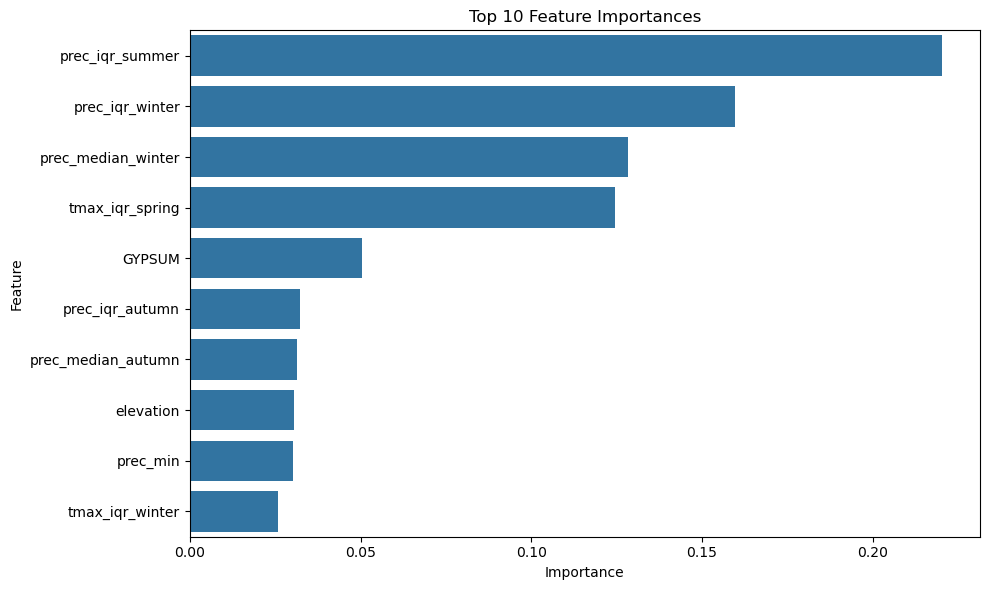

In [12]:
# Plot top 10 feature importances with their names
top_n = 10
top_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
feat_names, feat_importances = zip(*top_features)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(feat_importances), y=list(feat_names))
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
savepath = os.path.join(Image_dir, "decision_tree_feature_importances.png")
plt.savefig(savepath)
plt.show()


In [13]:
# save predictions, y_pred with their true labels and the model
import pickle
output_dir = "../../models/decision_tree"
os.makedirs(output_dir, exist_ok=True)
with open(os.path.join(output_dir, "y_test.pkl"), "wb") as f:
    pickle.dump(y_test, f)
with open(os.path.join(output_dir, "y_pred.pkl"), "wb") as f:
    pickle.dump(y_pred, f)
with open(os.path.join(output_dir, "decision_tree_model.pkl"), "wb") as f:
    pickle.dump(tree, f)
